<a href="https://colab.research.google.com/github/jthowinsson/time_series/blob/main/ModeloRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install arch


In [ ]:
pip install openpyxl

In [ ]:
 pip install dask

In [ ]:
pip install statsmodels

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from scipy import stats



In [ ]:
from google.colab import files
uploaded = files.upload()


Saving dataset2.xlsx to dataset2 (3).xlsx


In [ ]:
import pandas as pd

# Leer el archivo de Excel
data = pd.read_excel('dataset2.xlsx')


In [ ]:
import pandas as pd

# Leer todas las hojas de Excel y almacenarlas en un diccionario
dataset2 = pd.read_excel('dataset2.xlsx', sheet_name=None)

# Concatenar todas las hojas en un solo DataFrame
df_completo = pd.concat(dataset2.values(), ignore_index=True)

# Ver el DataFrame completo
print(df_completo)


        Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price  Customer ID         Country  
0       2009-12-01 07

In [ ]:
# Número de filas y columnas
filas, columnas = df_completo.shape
print(f"El DataFrame tiene {filas} filas y {columnas} columnas.")

# Número total de datos (celdas)
total_datos = df_completo.size
print(f"El DataFrame contiene un total de {total_datos} datos (celdas).")
data = df_completo
# Concatenar los datasets en un único DataFrame (ajusta esta parte si df_completo ya está definido)
df_completo = pd.concat(dataset2.values(), ignore_index=True)

# Asegurar que la columna 'InvoiceDate' sea de tipo datetime
df_completo['InvoiceDate'] = pd.to_datetime(df_completo['InvoiceDate'])

# Filtrar valores negativos en la columna 'Quantity'
df_completo = df_completo[df_completo['Quantity'] >= 0]

# Ordenar los datos por fecha para una mejor visualización
df_completo = df_completo.sort_values(by='InvoiceDate')
# Contar valores negativos en la columna 'Quantity'
cantidad_negativos = (df_completo['Quantity'] < 0).sum()

print(f"Hay {cantidad_negativos} valores negativos en la columna 'Quantity'.")


El DataFrame tiene 1067371 filas y 8 columnas.
El DataFrame contiene un total de 8538968 datos (celdas).
Hay 0 valores negativos en la columna 'Quantity'.


In [ ]:
pip install ace_tools

In [ ]:
pip search ace_tools

ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI no longer supports 'pip search' (or XML-RPC search). Please use https://pypi.org/search (via a browser) instead. See https://warehouse.pypa.io/api-reference/xml-rpc.html#deprecated-methods for more information.


In [ ]:
pip install git+https://github.com/usuario/ace_tools.git

  Cloning https://github.com/usuario/ace_tools.git to /tmp/pip-req-build-5i7t5v5t
  Running command git clone --filter=blob:none --quiet https://github.com/usuario/ace_tools.git /tmp/pip-req-build-5i7t5v5t
  fatal: could not read Username for 'https://github.com': No such device or address
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/usuario/ace_tools.git /tmp/pip-req-build-5i7t5v5t did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/usuario/ace_tools.git /tmp/pip-req-build-5i7t5v5t did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
import pandas as pd
import numpy as np

# Calcular el rango intercuartil (IQR) para detectar valores atípicos en 'Quantity'
Q1 = df_completo['Quantity'].quantile(0.25)
Q3 = df_completo['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los valores atípicos
outliers = df_completo[(df_completo['Quantity'] < lower_bound) | (df_completo['Quantity'] > upper_bound)]

# Filtrar los outliers que son menores a 60,000 o mayores a 60,000
filtered_outliers = outliers[(outliers['Quantity'] > 20000)]
filtered_outliers1 = outliers[(outliers['Quantity'] < -20000)]
print(filtered_outliers)
print(filtered_outliers1)
# Filtrar para eliminar valores mayores a 20000 y valores negativos
df_filtrado = df_completo[(df_completo['Quantity'] <= 20000) & (df_completo['Quantity'] >= 0)]

# Verificar el resultado
print(f"Filas originales: {df_completo.shape[0]}")
print(f"Filas después de filtrar: {df_filtrado.shape[0]}")
df_sinoutliers= df_filtrado
# Para ver las columnas de df_sinoutliers
print(df_sinoutliers.columns)
# Asegúrate de que 'DATE_TIME' esté en formato datetime
df_sinoutliers['DATE_TIME'] = pd.to_datetime(df_sinoutliers['InvoiceDate'])
# Asegúrate de que 'DATE_TIME' es una columna de tipo datetime
df_sinoutliers['DATE_TIME'] = pd.to_datetime(df_sinoutliers['DATE_TIME'], errors='coerce')
import pandas as pd

# Asegúrate de que la columna 'DATE_TIME' sea del tipo datetime
df_sinoutliers['DATE_TIME'] = pd.to_datetime(df_sinoutliers['DATE_TIME'], errors='coerce')

# Verificar si la conversión fue exitosa
print(df_sinoutliers['DATE_TIME'].head())  # Mostrar las primeras filas de la columna 'DATE_TIME'

# Verificar si hay valores nulos después de la conversión
print(f'Cantidad de valores nulos en DATE_TIME: {df_sinoutliers["DATE_TIME"].isna().sum()}')

# Si es necesario, establecer 'DATE_TIME' como índice (si se va a usar como tal)
df_sinoutliers.set_index('DATE_TIME', inplace=True)

# Ahora la columna 'DATE_TIME' está convertida correctamente a tipo datetime y como índice
print(df_sinoutliers.index)  # Verificar que el índice es de tipo DatetimeIndex

        Invoice StockCode                     Description  Quantity  \
587080   541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
1065882  581483     23843     PAPER CRAFT , LITTLE BIRDIE     80995   

                InvoiceDate  Price  Customer ID         Country  
587080  2011-01-18 10:01:00   1.04      12346.0  United Kingdom  
1065882 2011-12-09 09:15:00   2.08      16446.0  United Kingdom  
Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country]
Index: []
Filas originales: 1044421
Filas después de filtrar: 1044419
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')
0   2009-12-01 07:45:00
1   2009-12-01 07:45:00
2   2009-12-01 07:45:00
3   2009-12-01 07:45:00
4   2009-12-01 07:45:00
Name: DATE_TIME, dtype: datetime64[ns]
Cantidad de valores nulos en DATE_TIME: 0
DatetimeIndex(['2009-12-01 07:45:00', '2009-12-01 07:45:00',
       

<ipython-input-14-61bea737d70f>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['DATE_TIME'] = pd.to_datetime(df_sinoutliers['InvoiceDate'])
<ipython-input-14-61bea737d70f>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['DATE_TIME'] = pd.to_datetime(df_sinoutliers['DATE_TIME'], errors='coerce')
<ipython-input-14-61bea737d70f>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [ ]:
# Si 'DATE_TIME' es el índice, reseteamos el índice para convertirlo en una columna normal
df_sinoutliers.reset_index(inplace=True)

# Ahora 'DATE_TIME' es una columna normal, y puedes acceder a ella sin problemas
df_sinoutliers['DATE_TIME'] = pd.to_datetime(df_sinoutliers['DATE_TIME'], errors='coerce')

# Verificar si 'DATE_TIME' ahora está correctamente convertida
print(df_sinoutliers['DATE_TIME'].head())
# Si ya tienes el índice como 'DATE_TIME', no es necesario convertirlo a columna
df_sinoutliers.set_index('DATE_TIME', inplace=True)

# Verificar el tipo de índice (debe ser DatetimeIndex)
print(type(df_sinoutliers.index))  # Esto debe imprimir: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

0   2009-12-01 07:45:00
1   2009-12-01 07:45:00
2   2009-12-01 07:45:00
3   2009-12-01 07:45:00
4   2009-12-01 07:45:00
Name: DATE_TIME, dtype: datetime64[ns]
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


<ipython-input-15-7d68cb00d634>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['DATE_TIME'] = pd.to_datetime(df_sinoutliers['DATE_TIME'], errors='coerce')


EN ESTE PROCESO DEBEMOS REPARTIR NUESTROS DATOS en train test forcast Y TRABAJAR CON MIMAXESCALER

In [ ]:
train_size = int(len(df_sinoutliers) * 0.8)
train_data = df_sinoutliers.iloc[:train_size]
test_data = df_sinoutliers.iloc[train_size:]


In [ ]:
sample_data = df_sinoutliers.sample(frac=0.1, random_state=42)


In [ ]:
forecast_data = df_sinoutliers.tail(12)


In [ ]:
# Obtener los nombres de las columnas de 'df_sinoutliers'
column_names = df_sinoutliers.columns

# Imprimir los nombres de las columnas
print(column_names)
df_sinoutliers['InvoiceDate'] = pd.to_datetime(df_sinoutliers['InvoiceDate'], errors='coerce')


Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')


<ipython-input-19-007495cdfda6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['InvoiceDate'] = pd.to_datetime(df_sinoutliers['InvoiceDate'], errors='coerce')


In [ ]:
df_sinoutliers['Year'] = df_sinoutliers['InvoiceDate'].dt.year
df_sinoutliers['Month'] = df_sinoutliers['InvoiceDate'].dt.month
df_sinoutliers['Day'] = df_sinoutliers['InvoiceDate'].dt.day
df_sinoutliers['Hour'] = df_sinoutliers['InvoiceDate'].dt.hour
df_sinoutliers['Minute'] = df_sinoutliers['InvoiceDate'].dt.minute
df_sinoutliers['Second'] = df_sinoutliers['InvoiceDate'].dt.second


<ipython-input-20-b19bb3b17df4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['Year'] = df_sinoutliers['InvoiceDate'].dt.year
<ipython-input-20-b19bb3b17df4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['Month'] = df_sinoutliers['InvoiceDate'].dt.month
<ipython-input-20-b19bb3b17df4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Selección de las características (X) y la variable objetivo (y)
X = df_sinoutliers[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']]  # Características extraídas de 'InvoiceDate'
y = df_sinoutliers['Quantity']  # Variable objetivo

# Normalización de las características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 1. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Inicializar el MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# 3. Aplicar el escalado solo en el conjunto de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)  # Ajustar el scaler y transformar los datos de entrenamiento

# 4. Aplicar el escalado en el conjunto de prueba usando el mismo scaler (sin recalcular)
X_test_scaled = scaler.transform(X_test)  # Solo transformar el conjunto de prueba con el scaler ajustado en el conjunto de entrenamiento

# Ahora puedes usar X_train_scaled y X_test_scaled para entrenar y probar tu modelo.


In [ ]:
X_train.reset_index(drop=True, inplace=True)


In [ ]:
X_train.head()

,Year,Month,Day,Hour,Minute,Second
0,2009,12,11,15,40,0
1,2011,5,10,10,0,0
2,2011,11,29,17,52,0
3,2011,10,3,9,44,0
4,2010,11,26,16,31,0


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.diagnostic import acorr_ljungbox  # Para el Ljung-Box Test

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar formas de los datos
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_test: {X_test.shape}")
print(f"Forma de y_train: {y_train.shape}")
print(f"Forma de y_test: {y_test.shape}")

# Convertir DataFrames a matrices de NumPy
X_train = X_train.values
X_test = X_test.values

# Remodelar los datos para RNN: 3D (samples, timesteps, features)
X_train_rnn = X_train.reshape((X_train.shape[0], 6, 1))
X_test_rnn = X_test.reshape((X_test.shape[0], 6, 1))

print(f"Forma de X_train_rnn: {X_train_rnn.shape}")
print(f"Forma de X_test_rnn: {X_test_rnn.shape}")

# Modelar la red RNN
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, activation='relu', input_shape=(6, 1)))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer=Adam(), loss='mean_squared_error')

# Entrenar el modelo RNN
rnn_model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, verbose=1)

# Predicciones
y_pred_rnn = rnn_model.predict(X_test_rnn)

# Aplanar y_pred_rnn
y_pred_rnn = y_pred_rnn.flatten()

# Verificar formas después de aplanar
print(f"Forma de y_test: {y_test.shape}")
print(f"Forma de y_pred_rnn: {y_pred_rnn.shape}")

# Asegurarnos de que no hay valores NaN en y_test ni en las predicciones
if np.any(np.isnan(y_test)) or np.any(np.isnan(y_pred_rnn)):
    print("Hay valores NaN en y_test o y_pred_rnn. Verifica tus datos.")
elif y_test.shape[0] != y_pred_rnn.shape[0]:
    print(f"Error: y_test tiene {y_test.shape[0]} muestras, y_pred_rnn tiene {y_pred_rnn.shape[0]} muestras.")
else:
    # Calcular MSE (Mean Squared Error)
    mse_rnn = mean_squared_error(y_test, y_pred_rnn)
    # Calcular RMSE (Root Mean Squared Error)
    rmse_rnn = np.sqrt(mse_rnn)
    # Calcular MAE (Mean Absolute Error)
    mae_rnn = mean_absolute_error(y_test, y_pred_rnn)
    # Calcular MAPE (Mean Absolute Percentage Error)
    mape_rnn = np.mean(np.abs((y_test - y_pred_rnn) / y_test)) * 100  # MAPE en porcentaje

    # Calcular los residuos
    residuos = y_test - y_pred_rnn

    # Aplicar el Ljung-Box Test a los residuos
    ljung_box_result = acorr_ljungbox(residuos, lags=10)  # Prueba de autocorrelación para 10 lags
    p_value_ljung_box = ljung_box_result.iloc[-1, 1]  # P-value del último lag

    # Mostrar resultados
    print("Evaluación RNN:")
    print(f'MSE: {mse_rnn}')
    print(f'RMSE: {rmse_rnn}')
    print(f'MAE: {mae_rnn}')
    print(f'MAPE: {mape_rnn:.2f}%')
    print(f'Ljung-Box Test p-value: {p_value_ljung_box:.4f}')

Forma de X_train: (835535, 6)
Forma de X_test: (208884, 6)
Forma de y_train: (835535,)
Forma de y_test: (208884,)
Forma de X_train_rnn: (835535, 6, 1)
Forma de X_test_rnn: (208884, 6, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
26111/26111 ━━━━━━━━━━━━━━━━━━━━ 93s 3ms/step - loss: 5479.2026
Epoch 2/10
26111/26111 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 4712.8086
Epoch 3/10
26111/26111 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step - loss: 4408.5610
Epoch 4/10
26111/26111 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - loss: 5228.6167
Epoch 5/10
26111/26111 ━━━━━━━━━━━━━━━━━━━━ 83s 3ms/step - loss: 5630.1772
Epoch 6/10
26111/26111 ━━━━━━━━━━━━━━━━━━━━ 79s 3ms/step - loss: 6683.3032
Epoch 7/10
26111/26111 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 4121.7197
Epoch 8/10
26111/26111 ━━━━━━━━━━━━━━━━━━━━ 78s 3ms/step - loss: 5259.2188
Epoch 9/10
26111/26111 ━━━━━━━━━━━━━━━━━━━━ 78s 3ms/step - loss: 4897.0708
Epoch 10/10
26111/26111 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - loss: 4816.3398
6528/6528 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
Forma de y_test: (208884,)
Forma de y_pred_rnn: (208884,)
Evaluación RNN:
MSE: 4557.58984375
RMSE: 67.50992403898852
MAE: 11.829421043395996
MAPE: 398.63%
Ljung-Box Test p-value: 0.9987


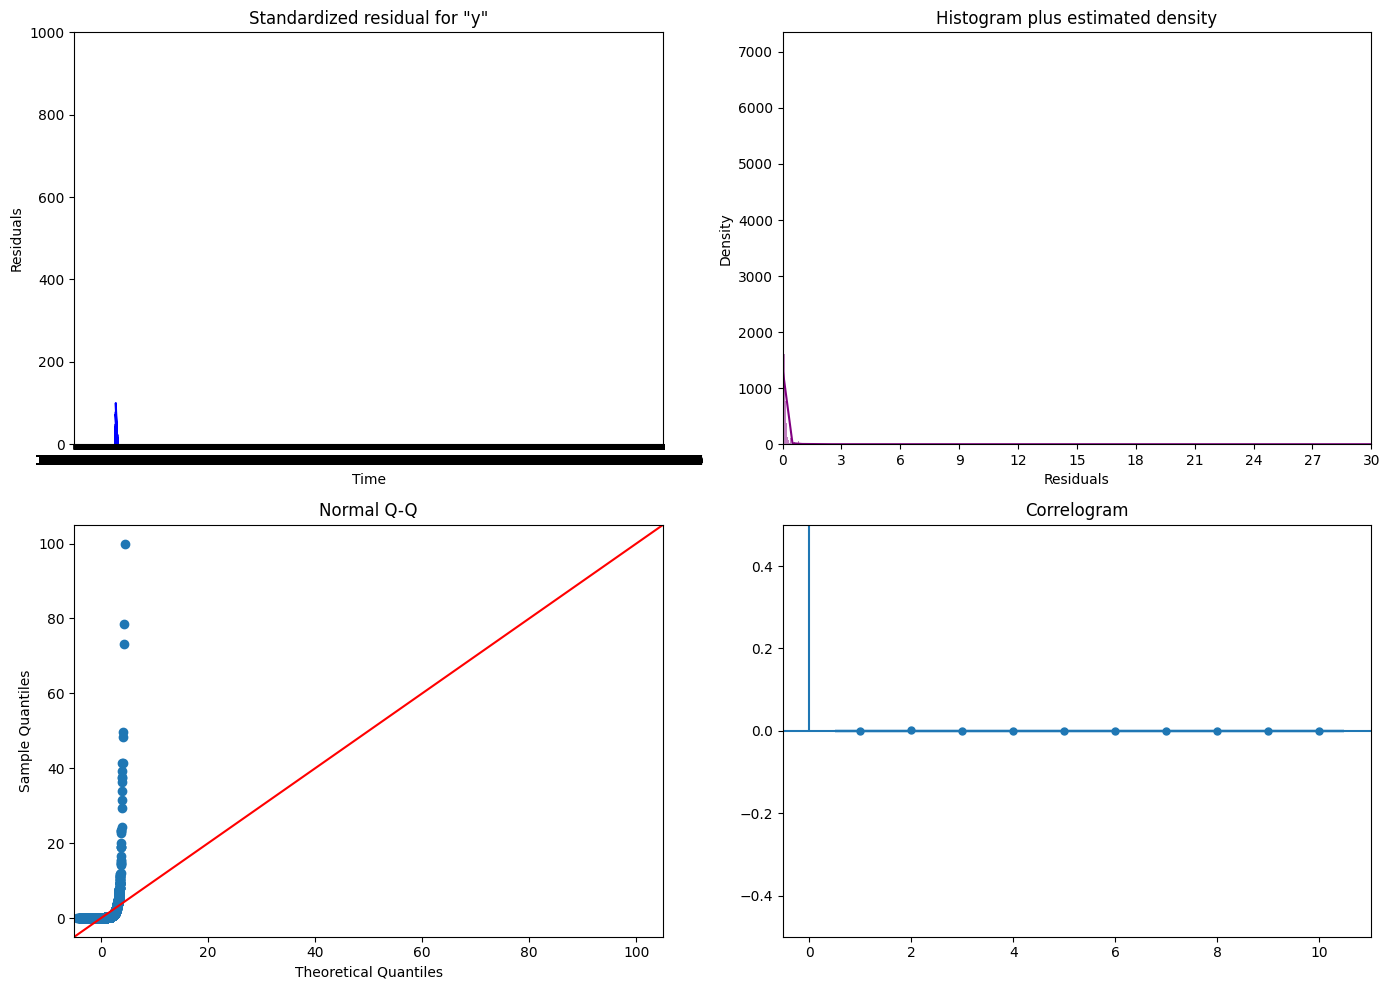

Evaluación RNN:
MSE: 4557.58984375
RMSE: 67.50992403898852
MAE: 11.829421043395996
MAPE: 398.63%
Ljung-Box Test p-value: 0.9987


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.diagnostic import acorr_ljungbox

# Asegúrate de que las predicciones estén aplanadas
# Calcular los residuos
residuos = y_test - y_pred_rnn

# Normalizar los residuos al rango [0, 100] para ajustar la escala
residuos_normalizados = 100 * (residuos - np.min(residuos)) / (np.max(residuos) - np.min(residuos))

# Crear subgráfico para las 4 visualizaciones
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1. Gráfico de residuos
axs[0, 0].plot(residuos_normalizados, color='blue')
axs[0, 0].set_title('Standardized residual for "y"')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Residuals')
axs[0, 0].set_ylim(0, 1000)  # Escala ajustada
axs[0, 0].set_xticks(np.arange(len(residuos_normalizados)))  # Mostrar valores en el eje X

# 2. Histograma y densidad estimada
sns.histplot(residuos_normalizados, kde=True, ax=axs[0, 1], color='purple')
axs[0, 1].set_title('Histogram plus estimated density')
axs[0, 1].set_xlabel('Residuals')
axs[0, 1].set_ylabel('Density')
axs[0, 1].set_xlim(0, 30)  # Escala ajustada
axs[0, 1].set_xticks(np.linspace(0, 30, 11))  # Aumentar la cantidad de valores en el eje X

# 3. Q-Q plot
qqplot(residuos_normalizados, line='45', ax=axs[1, 0])
axs[1, 0].set_title('Normal Q-Q')

# 4. Correlogram (gráfico de autocorrelación de residuos)
plot_acf(residuos_normalizados, lags=10, ax=axs[1, 1])  # Número de lags ajustable
axs[1, 1].set_title('Correlogram')
axs[1, 1].set_ylim(-0.5, 0.5)  # Rango de autocorrelación ajustado

# Mostrar todos los gráficos
plt.tight_layout()
plt.show()

# Evaluación de métricas (se asume que estas métricas ya fueron calculadas)
print("Evaluación RNN:")
print(f'MSE: {mse_rnn}')
print(f'RMSE: {rmse_rnn}')
print(f'MAE: {mae_rnn}')
print(f'MAPE: {mape_rnn:.2f}%')
print(f'Ljung-Box Test p-value: {p_value_ljung_box:.4f}')
